In [1]:
import sys 
sys.path.append("../")
import numpy as np
from matplotlib import pyplot as plt 

import torch 
import torchvision.transforms as transforms

from data_utils.get_datasets import get_dataset
from model_utils.get_models import get_model
from adversarial.adversarial_attack import  fgsm_attack, test_adv
from utils.plots import visualize_adv

In [2]:
%reload_ext autoreload
%autoreload 2

In [5]:
device = torch.device('cuda:0')
model = get_model("vgg16", 10, use_torchvision=False)
model = model.to(device)
model.eval()
checkpoint = torch.load("../saved_models/deterministic/vgg16/2023_11_24_15_25_21/vgg16_best_model_93.62.pth")
model.load_state_dict(checkpoint['state_dict'])

use private models...


<All keys matched successfully>

In [6]:
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
val_transform = transforms.Compose(
    [
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(
            (0.4914, 0.4822, 0.4465),
            (0.2023, 0.1994, 0.2010))
    ]
)
_, val_dataset = get_dataset("cifar10","../data",None,val_transform)
val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=1, shuffle=False,
    num_workers=4, pin_memory=True)

In [9]:
epsilons = [0,0.01,0.1]
accuracies = []
examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = test_adv(model, device, val_loader, eps, "pgd")
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 9362 / 10000 = 0.9362
Epsilon: 0.01	Test Accuracy = 406 / 10000 = 0.0406
Epsilon: 0.1	Test Accuracy = 1 / 10000 = 0.0001


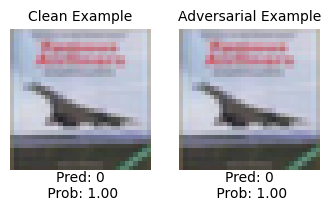

In [8]:
visualize_adv(*examples[0][3],mean, std)

In [ ]:
examples[0]